In [1]:
import pandas as pd

ovnis = pd.read_csv("https://raw.githubusercontent.com/oliveirafhm/data_science/master/df_OVNI_preparado.csv") # lendo o arquivo

In [ ]:
# verificando as colunas do dataframe
ovnis.columns

Index(['Unnamed: 0', 'City', 'State', 'Shape', 'Sight_Date', 'Sight_Time',
       'Sight_Weekday', 'Sight_Day', 'Sight_Month'],
      dtype='object')

In [2]:
cidade_phoenix = ovnis.loc[ovnis["City"]== "Phoenix"]

cidade_phoenix.sort_values(by="Sight_Date")

,Unnamed: 0,City,State,Shape,Sight_Date,Sight_Time,Sight_Weekday,Sight_Day,Sight_Month
19217,26361,Phoenix,AZ,Triangle,1/1/05,23:00,Sábado,1,1
45579,60785,Phoenix,AZ,Oval,1/1/12,00:00,Domingo,1,1
71408,92093,Phoenix,AZ,Light,1/1/16,12:00,Sexta-feira,1,1
36,49,Phoenix,AZ,Chevron,1/1/97,19:30,Quarta-feira,1,1
29222,39840,Phoenix,AZ,Oval,1/11/08,08:30,Sexta-feira,11,1
...,...,...,...,...,...,...,...,...,...
69390,89645,Phoenix,AZ,Fireball,9/4/15,18:45,Sexta-feira,4,9
14631,19986,Phoenix,AZ,Other,9/5/03,08:48,Sexta-feira,5,9
69374,89625,Phoenix,AZ,Light,9/5/15,20:45,Sábado,5,9
63598,82713,Phoenix,AZ,Fireball,9/8/14,22:00,Segunda-feira,8,9


In [3]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=d2d2414091a8295d0870287ee486d092f6a658469e458672137dfc790767e1e8
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [4]:
import pandasql

In [6]:
q = """
SELECT Sight_Date, count(*) as Views from cidade_phoenix Group by  sight_Day,sight_Month order by Sight_Date

"""
views_phoenix = pandasql.sqldf(q.lower(),locals())
views_phoenix


,Sight_Date,views
0,1/1/16,4
1,1/11/08,1
2,1/12/02,1
3,1/13/16,3
4,1/15/17,3
...,...,...
252,9/30/15,3
253,9/4/15,1
254,9/5/15,2
255,9/8/14,1


In [7]:
#Visualização dos dados em forma de Série Temporal:
#Observar o gráfico em barras da série temporal para o ano x de forma a investigar como se comporta a distribuição das visualizações.
#Saída para o ano de 1997 (exemplo):


views_phoenix.dtypes

views_phoenix["Sight_Date"] = pd.to_datetime(views_phoenix["Sight_Date"])
views_phoenix["Ano"] = views_phoenix["Sight_Date"].dt.year
views_phoenix["Mes"] =  views_phoenix["Sight_Date"].dt.month
views_phoenix


,Sight_Date,views,Ano,Mes
0,2016-01-01,4,2016,1
1,2008-01-11,1,2008,1
2,2002-01-12,1,2002,1
3,2016-01-13,3,2016,1
4,2017-01-15,3,2017,1
...,...,...,...,...
252,2015-09-30,3,2015,9
253,2015-09-04,1,2015,9
254,2015-09-05,2,2015,9
255,2014-09-08,1,2014,9


In [12]:
views_phoenix['Ano'].unique()

array([2016, 2008, 2002, 2017, 2009, 2014, 2015, 2013, 2012, 2004, 2006,
       2003, 2010, 2007, 2001, 1999, 2000, 1998, 2005, 2011, 1997])

In [27]:
ano_1997 = views_phoenix.loc[views_phoenix["Ano"]== 1997]
q = """
SELECT Ano, mes, count(*) as Views from ano_1997 Group by  mes 

"""
ano_1997 = pandasql.sqldf(q.lower(),locals())
ano_1997

,Ano,Mes,views
0,1997,6,1
1,1997,7,2


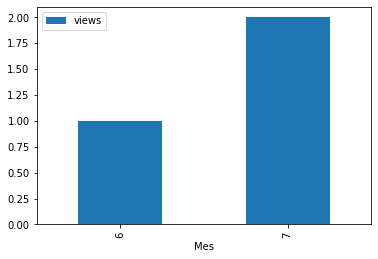

In [24]:
ano_1997.plot.bar(x='Mes',y='views')

In [8]:
teste = views_phoenix.loc[views_phoenix["Ano"]== 2010]
q = """
SELECT Ano, mes, count(*) as Views from teste Group by  mes 

"""
teste = pandasql.sqldf(q.lower(),locals())
teste


,Ano,Mes,views
0,2010,3,1
1,2010,7,1
2,2010,8,3
3,2010,9,1
4,2010,10,3


Text(0, 0.5, 'Views')

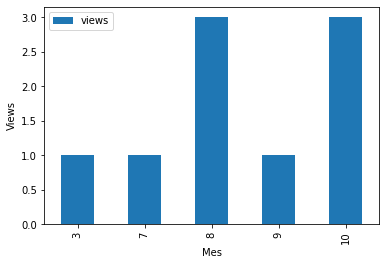

In [11]:
graph = teste.plot.bar(x='Mes', y='views')
graph.set_xlabel('Mes')
graph.set_ylabel('Views')

In [ ]:
#Observar o gráfico de linha da evolução do número de observações ao longo do tempo (anos).

In [ ]:
#Construção dos conjuntos de Treinamento e Teste:
#Separar 70% das observações para treinamento e 30% das observações para teste (como se trata de uma informação temporal,
##não podemos pegar uma amostra aleatória, sugestão: calcular o índice que corresponde a 70% das observações e considerar da primeira amostra até 
#ele para treinamento; e do índice seguinte até o final para teste).
#Exemplo conjunto de treinamento: